# **Correlação de Pearson**

In [11]:
import pandas as pd

dataset = pd.read_csv('Breast_cancer.csv', encoding = 'utf8')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Clump_Thickness        699 non-null    int64 
 1   Cell_Size_Uniformity   699 non-null    int64 
 2   Cell_Shape_Uniformity  699 non-null    int64 
 3   Marginal_Adhesion      699 non-null    int64 
 4   Single_Epi_Cell_Size   699 non-null    int64 
 5   Bare_Nuclei            699 non-null    object
 6   Bland_Chromatin        699 non-null    int64 
 7   Normal_Nucleoli        699 non-null    int64 
 8   Mitoses                699 non-null    int64 
 9   Class                  699 non-null    object
dtypes: int64(8), object(2)
memory usage: 54.7+ KB


In [12]:
# Obtendo os nomes das colunas Numéricas
tipos_numericos = ['int64']
att_numericos = dataset.select_dtypes(include = tipos_numericos)

## selecionando as colunas
att_numericos= list(att_numericos.columns)

dataset_numerico = dataset[att_numericos] # Features
print(dataset_numerico)

     Clump_Thickness  Cell_Size_Uniformity  Cell_Shape_Uniformity  \
0                  5                     1                      1   
1                  5                     4                      4   
2                  3                     1                      1   
3                  6                     8                      8   
4                  4                     1                      1   
..               ...                   ...                    ...   
694                3                     1                      1   
695                2                     1                      1   
696                5                    10                     10   
697                4                     8                      6   
698                4                     8                      8   

     Marginal_Adhesion  Single_Epi_Cell_Size  Bland_Chromatin  \
0                    1                     2                3   
1                    5                   

***Matriz de Correlação***

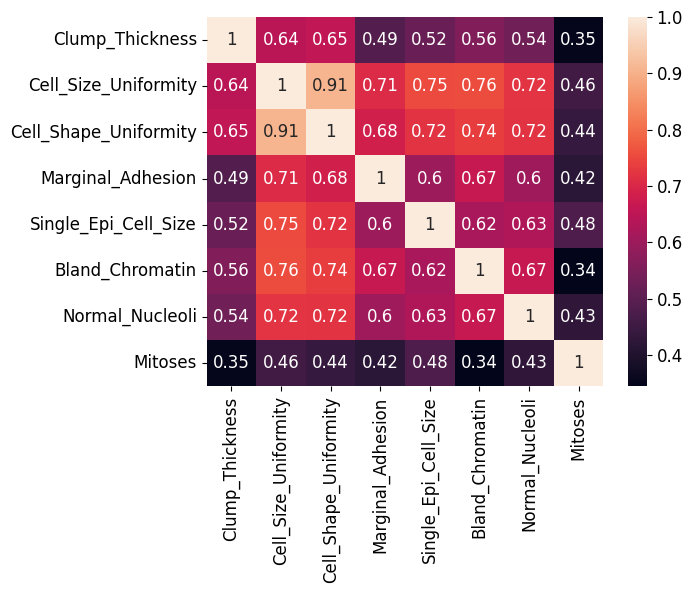

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt

pearson = dataset_numerico.corr(method = 'pearson')
sn.heatmap(pearson, annot = True)
plt.show()

***Seleção de Atributos***

In [22]:
dataset2 = pd.read_csv('Image.csv', encoding = 'utf-8')

dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   att1    2310 non-null   int64  
 1   att2    2310 non-null   int64  
 2   att3    2310 non-null   int64  
 3   att4    2310 non-null   float64
 4   att5    2310 non-null   float64
 5   att6    2310 non-null   float64
 6   att7    2310 non-null   float64
 7   att8    2310 non-null   float64
 8   att9    2310 non-null   float64
 9   att10   2310 non-null   float64
 10  att11   2310 non-null   float64
 11  att12   2310 non-null   float64
 12  att13   2310 non-null   float64
 13  att14   2310 non-null   float64
 14  att15   2310 non-null   float64
 15  att16   2310 non-null   float64
 16  att17   2310 non-null   float64
 17  att18   2310 non-null   float64
 18  att19   2310 non-null   float64
 19  Class   2310 non-null   object 
dtypes: float64(16), int64(3), object(1)
memory usage: 361.1+ KB


In [23]:
# Obtendo os nomes das colunas Numéricas
tipos_numericos = ['int64', 'float64']
att_numericos = dataset2.select_dtypes(include = tipos_numericos)

## selecionando as colunas
att_numericos= list(att_numericos.columns)

dataset_numerico = dataset2[att_numericos] # Features
print(dataset_numerico)

### Pegando o rótulo
rotulo = dataset2.Class      # Target variable (classe)

      att1  att2  att3      att4  att5      att6      att7      att8  \
0      140   125     9  0.000000   0.0  0.277778  0.062963  0.666667   
1      188   133     9  0.000000   0.0  0.333333  0.266667  0.500000   
2      105   139     9  0.000000   0.0  0.277778  0.107407  0.833333   
3       34   137     9  0.000000   0.0  0.500000  0.166667  1.111111   
4       39   111     9  0.000000   0.0  0.722222  0.374074  0.888889   
...    ...   ...   ...       ...   ...       ...       ...       ...   
2305    32   158     9  0.000000   0.0  0.944445  0.862963  0.833333   
2306     8   162     9  0.111111   0.0  1.611111  2.062962  0.333333   
2307   128   161     9  0.000000   0.0  0.555555  0.251852  0.777778   
2308   150   158     9  0.000000   0.0  2.166667  1.633334  1.388889   
2309   124   162     9  0.111111   0.0  1.388889  1.129630  2.000000   

          att9      att10     att11      att12     att13     att14      att15  \
0     0.311111   6.185185  7.333334   7.666666  3.5555

***Mostrando a Matriz de Correlação***

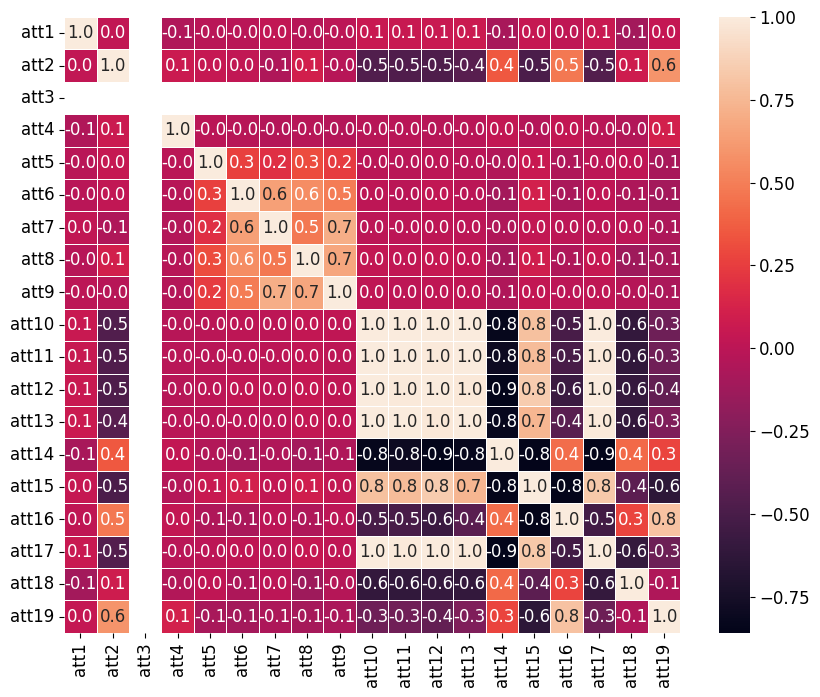

In [24]:
import seaborn as sn
import matplotlib.pyplot as plt

pearson = dataset_numerico.corr(method = 'pearson')

# Create an annotated heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
plt = sn.heatmap(pearson, annot = True, fmt = '.1f', square=True, linewidths = .5)

In [25]:
#pearson threshold wanted
threshold = 0.75

pearson = dataset_numerico.corr(method = 'pearson')

#replace all '1.0' values (wich represent column versus itself) with 0.0
pearson_new = pearson.replace(1.0, 0)

#get name from columns that have values major than threshold - with huge correlation to any attribute
columns_to_exclude = list(pearson_new.loc[:, (pearson_new > threshold).any()])

#make list of attributes you need to hold in new dataset
attributes_to_hold = list(set(dataset_numerico)-set(columns_to_exclude))

#create new csv dataset with only selected columns(attributes_to_hold)
df = pd.DataFrame(dataset_numerico, columns = attributes_to_hold)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   att8    2310 non-null   float64
 1   att18   2310 non-null   float64
 2   att3    2310 non-null   int64  
 3   att9    2310 non-null   float64
 4   att6    2310 non-null   float64
 5   att1    2310 non-null   int64  
 6   att5    2310 non-null   float64
 7   att4    2310 non-null   float64
 8   att14   2310 non-null   float64
 9   att2    2310 non-null   int64  
 10  att7    2310 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 198.6 KB


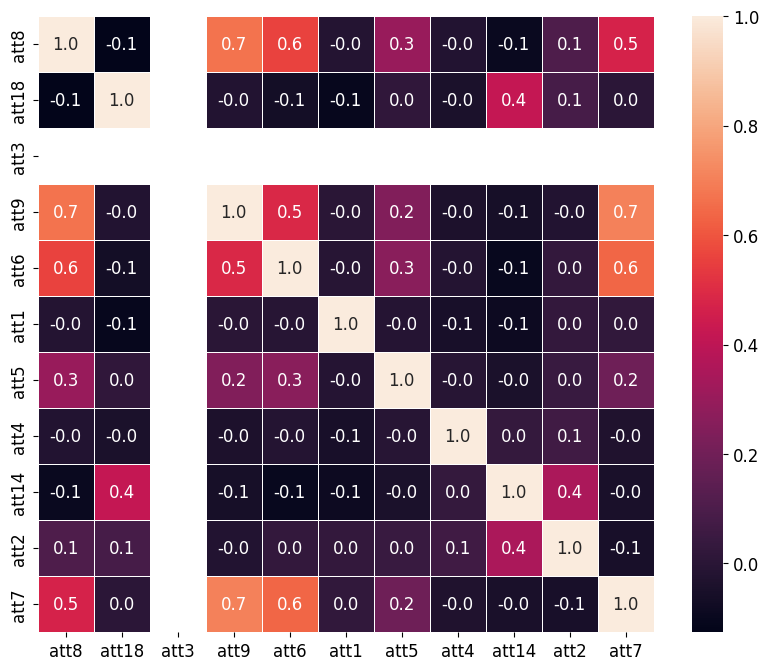

In [27]:
import seaborn as sn
import matplotlib.pyplot as plt

pearson2 = df.corr(method = 'pearson')

# Create an annotated heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
plt = sn.heatmap(pearson2, annot = True, fmt = '.1f', square=True, linewidths = .5)